In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [22]:
from crypto_data_fetcher.gmo import GmoFetcher
import joblib
import ccxt

In [35]:
BYBIT = "Bybit"
FTX = "FTX"

EXCHANGE = FTX # BYBIT
INTERVAL = 1 # min

In [34]:
from crypto_data_fetcher.bybit import BybitFetcher
from crypto_data_fetcher.ftx import FtxFetcher

In [ ]:
if EXCHANGE == "GMO":
    memory = joblib.Memory('/tmp/gmo_fetcher_cache', verbose=0)
    fetcher = GmoFetcher(memory=memory)
    df = fetcher.fetch_ohlcv(
        market='BTC_JPY', # 市場のシンボルを指定
        interval_sec=1 * 60, # 足の間隔を秒単位で指定。この場合は15分足
    )
    df.to_csv("GMO_ohlcv_minute_BTCJPY_20180901_20211124.csv")

2018-09-01.2018-10-01.2018-10-31.2018-11-30.2018-12-30.2019-01-29.2019-02-28.2019-03-30.2019-04-29.2019-05-29.2019-06-28.2019-07-28.2019-08-27.2019-09-26.2019-10-26.2019-11-25.2019-12-25.2020-01-24.2020-02-23.2020-03-24.2020-04-23.2020-05-23.2020-06-22.2020-07-22.2020-08-21.2020-09-20.2020-10-20.2020-11-19.2020-12-19.2021-01-18.2021-02-17.2021-03-19.2021-04-18.2021-05-18.2021-06-17.2021-07-17.2021-08-16.2021-09-15.2021-10-15.2021-11-14.

In [26]:
if EXCHANGE == BYBIT:
    fetcher = BybitFetcher(ccxt_client=ccxt.bybit())
    df = fetcher.fetch_ohlcv(
        df=None,                 
        start_time=pd.to_datetime('2021-12-01 00:00:00Z', utc=True),
        interval_sec=INTERVAL * 60,
        market='BTCUSD',
        price_type=None)

In [42]:
if EXCHANGE == FTX:
    ftx = ccxt.ftx({ "verbose": False })
    fetcher = FtxFetcher(ccxt_client=ftx)
    df = fetcher.fetch_ohlcv(
        market='BTC/USD',
        interval_sec=INTERVAL * 60,
        start_time=pd.to_datetime('2021-12-01 00:00:00Z', utc=True),
    )

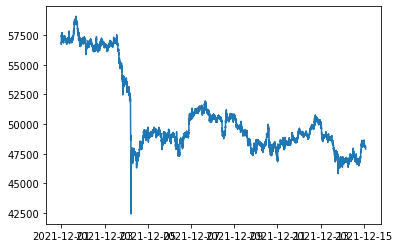

In [43]:
plt.plot(df["cl"])

In [44]:
df.to_csv("test.csv")

In [45]:
pd.read_csv("test.csv")

,timestamp,op,hi,lo,cl,volume
0,2021-12-01 00:00:00+00:00,56986.0,57054.0,56863.0,56880.0,1.248711e+06
1,2021-12-01 00:01:00+00:00,56872.0,56916.0,56784.0,56784.0,5.129694e+05
2,2021-12-01 00:02:00+00:00,56784.0,56790.0,56708.0,56711.0,9.257457e+05
3,2021-12-01 00:03:00+00:00,56713.0,56841.0,56690.0,56791.0,1.697789e+06
4,2021-12-01 00:04:00+00:00,56791.0,56902.0,56785.0,56861.0,3.843225e+05
...,...,...,...,...,...,...
20256,2021-12-15 02:03:00+00:00,48047.0,48052.0,48009.0,48010.0,1.117583e+05
20257,2021-12-15 02:04:00+00:00,48010.0,48034.0,47987.0,47988.0,4.239658e+05
20258,2021-12-15 02:05:00+00:00,47988.0,47996.0,47918.0,47932.0,4.044684e+05
20259,2021-12-15 02:06:00+00:00,47932.0,47942.0,47852.0,47917.0,1.203604e+06
